# Define configs

In [99]:
import os
import sys
sys.path.insert(0, os.path.abspath('../code'))
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import rnn_model
import utils

In [5]:
embed_size = 300
max_comment_size = 250
fraction_dev = 0.3
label_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
class_weights = [1.0, 9.58871448, 1.810155, 31.99581504, 1.94160208, 10.88540896]

train_data_file = '../data/train.csv'
train_tokens_file = '../data/train_comments.p'

test_data_file = '../data/test.csv'
test_tokens_file = '../data/test_comments.p'

out_dir = 'out/'

# Define configs                                                                                                                                                                                     
debug = 1000

In [107]:
config = {
    'exp_name': 'new_test_11',
    'n_epochs': 50,
    'embed_size': embed_size,
    'n_labels': len(label_names),
    'class_weights': class_weights,
    'max_comment_size': max_comment_size,
    'state_size': 50,
    'lr': .0005,
    'batch_size': 1024,
    'cell_type': 'LSTM',
    'cell_kwargs': {},
    'dropout': True,
    'keep_prob': 0.5,
    'n_layers': 1,
    'bidirectional': True,
    'averaging': True,
    'attention': True,
    'attention_size': 10,
    'sparsemax': False,
    'clip_gradients': False,
    'max_grad_norm': 5
}

# Load and process data

In [6]:
data = rnn_model.load_and_process(train_data_file, test_data_file,
                                  train_tokens_file, test_tokens_file,
                                  embed_size=embed_size,
                                  max_comment_size=max_comment_size,
                                  label_names=label_names,
                                  fraction_dev=fraction_dev, debug=debug)

(emb_data, train_dev_set, test_set) = data
(tokens_train, labels_train, masks_train, tokens_dev, labels_dev, masks_dev) = train_dev_set
(id_test, tokens_test, masks_test) = test_set

100%|██████████| 400000/400000 [00:50<00:00, 7989.28it/s]

Loading GLoVE vectors from file: ../data/glove/glove.6B.300d.txt


# Load trained model

In [115]:
save_prefix = os.path.join(out_dir, config['exp_name'], config['exp_name'])
model = rnn_model.PredictWithRNNModel(config, emb_data, save_prefix)

# Visualize

Predicted probability of toxic = 0.0158
Predicted probability of severe_toxic = 0.0013
Predicted probability of obscene = 0.0056
Predicted probability of threat = 0.0008
Predicted probability of insult = 0.0068
Predicted probability of identity_hate = 0.0010


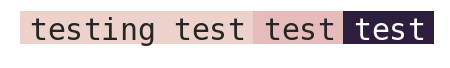

In [120]:
sentence = "Testing test test test"
model.predict_sentence(sentence)

## All threats

In [117]:
label_names

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [118]:
inds = np.where(labels_train[:, 3] == 1)[0]
tokens_batch = utils._get_items(tokens_train, inds)
masks_batch = utils._get_items(masks_train, inds)

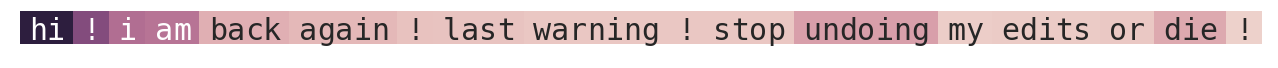

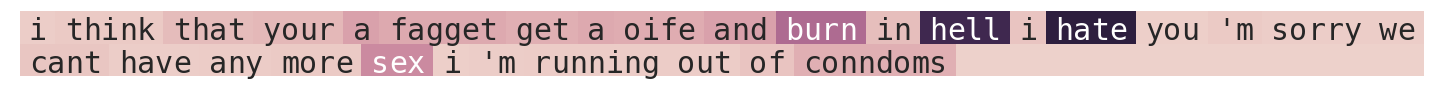

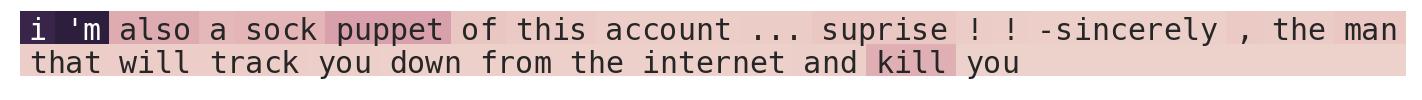

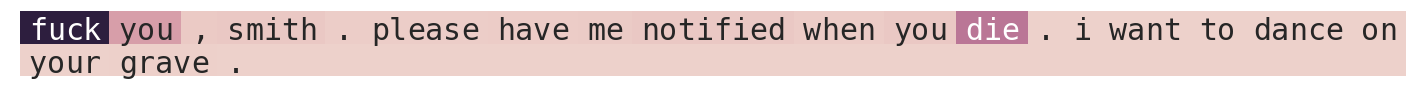

In [126]:
y_prob_batch, alphas_batch = model.predict_batch(tokens_batch, masks_batch)
for t, a, m in zip(tokens_batch, alphas_batch, masks_batch):
    evaluate.highlight_sentence(t, a, m)